In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
df1 = pd.read_csv('data_ejep/propostas/arquivo_final.csv')
df2 = pd.read_csv('data_ejep/precificacao/df_2013_clean.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('data_ejep/precificacao/df_2014_5_6.csv', encoding='ISO-8859-1')
df4 = pd.read_csv('data_ejep/precificacao/df_2017_8.csv', encoding='ISO-8859-1')
df5 = pd.read_csv('data_ejep/membros/all_members.csv', encoding='UTF-8')
df6 = pd.read_csv('data_ejep/propostas/arquivo_final1.csv')

/home/gabriela/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,24,25,26,27,35,38,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
pd.options.display.max_colaamns = 130

In [17]:
from datetime import datetime
from dateutil.parser import parse

In [18]:
dates = df4['data'].astype(np.int64)
dates = dates.apply(lambda x: pd.datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2))
df4['data'] = dates

In [19]:
df4['Ano'] = df4['data'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df4['Mes'] = df4['data'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [20]:
df4['Sem'] = df4['Mes'].copy()[df4['Mes'] < 7] = 1
df4['Sem'] = df4['Mes'].copy()[df4['Mes'] > 6] = 7

In [21]:
df5 = df5.rename(columns={'Nome completo':'Nome_completo'})

In [22]:
df5['Ano'] = df5['date_now'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df5['Mes'] = df5['date_now'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [23]:
dfx = pd.merge(df4,df5, on = "Nome_completo", how='outer')

In [24]:
dfx

,Unnamed: 0_x,Path,Nome,Apelido,vendedor,data,distancia,unidade_tempo,tempo,cst_1,cst2,cst3,cst4,cst5,horas_cst1,horas_cst2,horas_cst3,horas_cst4,horas_cst5,tipo_projeto,area,detalhe,perspectiva_recompra,oportunidade,risco,porte,tipo_empresa,markup,preço,Nome_completo,Ano_x,Mes_x,Sem,Unnamed: 0_y,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,key,date_now,Localizacao,date_UFSC,date_EJEP,Ano_y,Mes_y
0,0.0,.\Em processo de venda\Açaí II - Gestão de Est...,Frutos de Goiás,Açaí II,Bello,2017-04-25,9.0,Por Semanas,14.0,Interno,Externo,Externo,NaN,NaN,15.0,15.0,10.0,NaN,NaN,Consultoria,Logística,Não Necessário,Médio,Médio,Baixo,Médio,Comércio/Serviço,0.5245,10000.0,Lucas Siqueira Bello,2017.0,4.0,7.0,83.0,PJT,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,83.0,2017-01-01,Córrego Grande,2015-01-01,2016-01-01,2017.0,1.0
1,0.0,.\Em processo de venda\Açaí II - Gestão de Est...,Frutos de Goiás,Açaí II,Bello,2017-04-25,9.0,Por Semanas,14.0,Interno,Externo,Externo,NaN,NaN,15.0,15.0,10.0,NaN,NaN,Consultoria,Logística,Não Necessário,Médio,Médio,Baixo,Médio,Comércio/Serviço,0.5245,10000.0,Lucas Siqueira Bello,2017.0,4.0,7.0,114.0,ADM,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,114.0,2016-07-01,Córrego Grande,2015-01-01,2016-01-01,2016.0,7.0
2,0.0,.\Em processo de venda\Açaí II - Gestão de Est...,Frutos de Goiás,Açaí II,Bello,2017-04-25,9.0,Por Semanas,14.0,Interno,Externo,Externo,NaN,NaN,15.0,15.0,10.0,NaN,NaN,Consultoria,Logística,Não Necessário,Médio,Médio,Baixo,Médio,Comércio/Serviço,0.5245,10000.0,Lucas Siqueira Bello,2017.0,4.0,7.0,148.0,TRN,Trainee,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,148.0,2016-01-01,Córrego Grande,2015-01-01,2016-01-01,2016.0,1.0
3,40.0,.\Não Vendidas\RH - Pesquisa de Mercado\Precif...,Pessoa Física (Thiago),RH,Bello,2017-05-10,10.0,Por Semanas,8.0,Interno,Externo,NaN,NaN,NaN,15.0,20.0,NaN,NaN,NaN,Consultoria,Análise de Viabilidade,Não Necessário,Baixo,Alto,Baixo,Baixo,Comércio/Serviço,0.4440,5000.0,Lucas Siqueira Bello,2017.0,5.0,7.0,83.0,PJT,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,83.0,2017-01-01,Córrego Grande,2015-01-01,2016-01-01,2017.0,1.0
4,40.0,.\Não Vendidas\RH - Pesquisa de Mercado\Precif...,Pessoa Física (Thiago),RH,Bello,2017-05-10,10.0,Por Semanas,8.0,Interno,Externo,NaN,NaN,NaN,15.0,20.0,NaN,NaN,NaN,Consultoria,Análise de Viabilidade,Não Necessário,Baixo,Alto,Baixo,Baixo,Comércio/Serviço,0.4440,5000.0,Lucas Siqueira Bello,2017.0,5.0,7.0,114.0,ADM,Gerente,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,114.0,2016-07-01,Córrego Grande,2015-01-01,2016-01-01,2016.0,7.0
5,40.0,.\Não Vendidas\RH - Pesquisa de Mercado\Precif...,Pessoa Física (Thiago),RH,Bello,2017-05-10,10.0,Por Semanas,8.0,Interno,Externo,NaN,NaN,NaN,15.0,20.0,NaN,NaN,NaN,Consultoria,Análise de Viabilidade,Não Necessário,Baixo,Alto,Baixo,Baixo,Comércio/Serviço,0.4440,5000.0,Lucas Siqueira Bello,2017.0,5.0,7.0,148.0,TRN,Trainee,lucassiqueirabello@gmail.com,1996-12-11,Mecânica,148.0,2016-01-01,Córrego Grande,2015-01-01,2016-01-01,2016.0,1.0
6,1.0,.\Em processo de venda\Bateau - MP\Precificaçã...,Intech Boating,Bateau,Fernanda,2017-04-03,21.4,Por Semanas,20.0,Interno,Externo,Interno,Externo,Externo,15.0,15.0,15.0,15.0,15.0,Consultoria,MP,Estado Futuro,Muito Alto,Muito Alto,Muito Alto,Alto,Indústria,0.4480,21.000,Fernanda Barbosa Alonso,2017.0,4.0,7.0,103.0,PJT,Gerente,alonsofernanda14@gmail.com,1994-09-14,Elétrica,103.0,2016-07-01,Trindade,2014-01-01,2015-07-01,2016.0,7.0
7,1.0,.\Em processo de venda\Bateau - MP\Precificaçã...,Intech Boating,Bateau,Fernanda,2017-04-03,21.4,Por Semanas,20.0,Interno,Externo,Interno,Externo,Externo,15.0,15.0,15.0,15.0,15.0,Consultoria,MP,Estado Futuro,Muito Alto,Muito Alto,Muito Alto,Alto,Indústria,0.4480,21.000,Fernanda Barbosa Alonso,2017.0,4.0,7.0,136.0,MKT,Gerente,alonsofernanda14@gmail.com,1994-09-14,Elétrica,136.0,2016-01-01,Trindade,2014-01-01,2015-07-01,2016.0,1.0
8,1.0,.\Em processo de venda\Bateau - MP\Precificaçã...,Intech Boating,Bateau,Fernanda,201

In [25]:
dfx = dfx[dfx['Ano_x'] == dfx['Ano_y']]
dfx = dfx[dfx['Sem'] == dfx['Mes_y']]

In [26]:
dfx.head()

,Unnamed: 0_x,Path,Nome,Apelido,vendedor,data,distancia,unidade_tempo,tempo,cst_1,cst2,cst3,cst4,cst5,horas_cst1,horas_cst2,horas_cst3,horas_cst4,horas_cst5,tipo_projeto,area,detalhe,perspectiva_recompra,oportunidade,risco,porte,tipo_empresa,markup,preço,Nome_completo,Ano_x,Mes_x,Sem,Unnamed: 0_y,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,key,date_now,Localizacao,date_UFSC,date_EJEP,Ano_y,Mes_y
9,2.0,.\Em processo de venda\Favorável - MP-Melhoria...,Eco Construtora Favaretto,Favorável,Yuri,2017-03-30,1.0,Por Semanas,11.0,Interno,Interno,Trainee,NaN,NaN,20.0,20.0,20.0,NaN,NaN,Consultoria,MP,Melhoria de Processo,Baixo,Médio,Médio,Baixo,Comércio/Serviço,0.4090,5010,Yuri Boing,2017.0,3.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
13,2.0,.\Em processo de venda\Diabetes - Análise de v...,-,diabetes,yuri,2017-05-18,10.0,Por Semanas,5.0,Interno,Externo,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN,Consultoria,SAG,Não Necessário,Baixo,Baixo,Baixo,Baixo,Indústria,0.4000,2600.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
17,55.0,.\Em processo de venda\Golfe - Layout (MP)\MP\...,-,diabetes,yuri,2017-05-18,1.0,Por Semanas,1.0,Interno,Externo,Externo,NaN,NaN,130.0,220.0,220.0,NaN,NaN,Consultoria,MP,Estado Atual,Muito Alto,Médio,Baixo,Baixo,Indústria,0.4000,8100.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
21,75.0,.\Não Vendidas\Tênis - Logística\Venda\Precifi...,TNS,Tenis,Yuri,2017-05-10,5.4,Por Semanas,10.0,Interno,Externo,Trainee,NaN,NaN,20.0,15.0,15.0,NaN,NaN,Consultoria,MP,Estado Atual,Médio,Médio,Baixo,Médio,Indústria,0.4045,5400.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
25,3.0,.\Em processo de venda\Multiplic - Lean Office...,Duplic Digital,Multiplic,Canonica,2017-05-04,2.6,Por Semanas,10.0,Interno,Externo,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN,Consultoria,MFV,Melhoria de Processo,Médio,Médio,Médio,Baixo,Comércio/Serviço,0.4000,5400.0,Gabriel Canonica,2017.0,5.0,7.0,42.0,RH,Diretor,gabrielcanonica@gmail.com,1996-06-07,Civil,42.0,2017-07-01,Pantanal,2015-01-01,2016-07-01,2017.0,7.0


In [27]:
merged_prec = pd.concat([df2,df3,dfx])

/home/gabriela/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [28]:
merged_prec.shape

(181, 49)

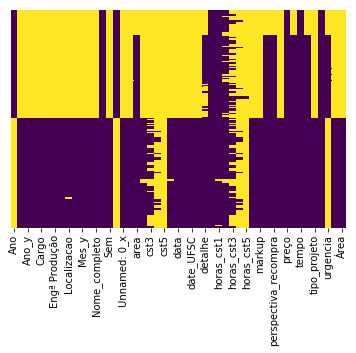

In [29]:
figsize=(10,30)
sns.heatmap(merged_prec.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [30]:
dfx

,Unnamed: 0_x,Path,Nome,Apelido,vendedor,data,distancia,unidade_tempo,tempo,cst_1,cst2,cst3,cst4,cst5,horas_cst1,horas_cst2,horas_cst3,horas_cst4,horas_cst5,tipo_projeto,area,detalhe,perspectiva_recompra,oportunidade,risco,porte,tipo_empresa,markup,preço,Nome_completo,Ano_x,Mes_x,Sem,Unnamed: 0_y,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,key,date_now,Localizacao,date_UFSC,date_EJEP,Ano_y,Mes_y
9,2.0,.\Em processo de venda\Favorável - MP-Melhoria...,Eco Construtora Favaretto,Favorável,Yuri,2017-03-30,1.0,Por Semanas,11.0,Interno,Interno,Trainee,NaN,NaN,20.0,20.0,20.0,NaN,NaN,Consultoria,MP,Melhoria de Processo,Baixo,Médio,Médio,Baixo,Comércio/Serviço,0.4090,5010,Yuri Boing,2017.0,3.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
13,2.0,.\Em processo de venda\Diabetes - Análise de v...,-,diabetes,yuri,2017-05-18,10.0,Por Semanas,5.0,Interno,Externo,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN,Consultoria,SAG,Não Necessário,Baixo,Baixo,Baixo,Baixo,Indústria,0.4000,2600.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
17,55.0,.\Em processo de venda\Golfe - Layout (MP)\MP\...,-,diabetes,yuri,2017-05-18,1.0,Por Semanas,1.0,Interno,Externo,Externo,NaN,NaN,130.0,220.0,220.0,NaN,NaN,Consultoria,MP,Estado Atual,Muito Alto,Médio,Baixo,Baixo,Indústria,0.4000,8100.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
21,75.0,.\Não Vendidas\Tênis - Logística\Venda\Precifi...,TNS,Tenis,Yuri,2017-05-10,5.4,Por Semanas,10.0,Interno,Externo,Trainee,NaN,NaN,20.0,15.0,15.0,NaN,NaN,Consultoria,MP,Estado Atual,Médio,Médio,Baixo,Médio,Indústria,0.4045,5400.0,Yuri Boing,2017.0,5.0,7.0,62.0,ADM,Diretor,yuriboing4@gmail.com,1996-10-31,Elétrica,62.0,2017-07-01,Jurere,2015-01-01,2016-01-01,2017.0,7.0
25,3.0,.\Em processo de venda\Multiplic - Lean Office...,Duplic Digital,Multiplic,Canonica,2017-05-04,2.6,Por Semanas,10.0,Interno,Externo,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN,Consultoria,MFV,Melhoria de Processo,Médio,Médio,Médio,Baixo,Comércio/Serviço,0.4000,5400.0,Gabriel Canonica,2017.0,5.0,7.0,42.0,RH,Diretor,gabrielcanonica@gmail.com,1996-06-07,Civil,42.0,2017-07-01,Pantanal,2015-01-01,2016-07-01,2017.0,7.0
27,19.0,.\Em processo de venda\Skipper - MFI\Precifica...,Kiper,Skipper,Canonica,2017-11-07,2.0,Por Semanas,10.0,Interno,Externo,Trainee,NaN,NaN,10.0,12.5,12.5,NaN,NaN,Consultoria,MFV,Não Necessário,Baixo,Baixo,Alto,Alto,Comércio/Serviço,0.5470,7100.0,Gabriel Canonica,2017.0,11.0,7.0,42.0,RH,Diretor,gabrielcanonica@gmail.com,1996-06-07,Civil,42.0,2017-07-01,Pantanal,2015-01-01,2016-07-01,2017.0,7.0
29,49.0,.\Não Vendidas\Índia - Pesquisa de Mercado\Pre...,Empresário Henrique,Índia,Canonica,2017-06-21,0.0,Por Semanas,5.0,Interno,Externo,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN,Consultoria,Análise de Viabilidade,Não Necessário,Baixo,Médio,Médio,Baixo,Comércio/Serviço,0.4590,2200.0,Gabriel Canonica,2017.0,6.0,7.0,42.0,RH,Diretor,gabrielcanonica@gmail.com,1996-06-07,Civil,42.0,2017-07-01,Pantanal,2015-01-01,2016-07-01,2017.0,7.0
32,4.0,.\Não Vendidas\beta III - 5S e Layout\Precific...,Alfakit,Delta 2,Rogedo,2017-03-30,10.8,Por Semanas,11.0,Interno,Interno,Externo,NaN,NaN,15.0,15.0,20.0,NaN,NaN,Consultoria,Layout,Não Necessário,Alto,Alto,Médio,Médio,Indústria,0.4320,6600,Gabriel Rogedo Chiarelli,2017.0,3.0,7.0,43.0,TRN,Gerente,gabrielrogedochiarelli@gmail.com,1996-04-11,Elétrica,43.0,2017-07-01,Trindade,2016-01-01,2017-01-01,2017.0,7.0
35,16.0,.\Vendidas\Amarelinha T - SAG\Vendas\yellows p...,Yelow's,Gases T,Rogedo,2017-05-04,0.0,Por Semanas,9.0,Interno,Trainee,Externo,NaN,NaN,15.0,20.0,15.0,NaN,NaN,Consultoria,SAG,Não Necessário,Médio,Médio,Médio,Baixo,Comércio/Serviço,0.4000,4200.0,Gabriel Rogedo Chiarelli,2017.0,5.0,7.0,43.0,TRN,Gerente,gabrielrogedochiarelli@gmail.com,1996-04-11,Elétrica,43.0,2017-07-01,Trindade,20

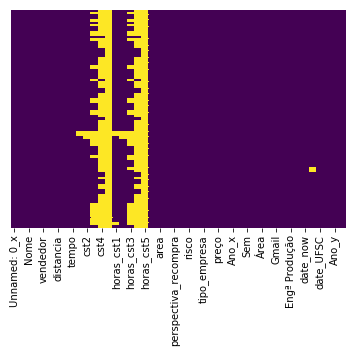

In [31]:
figsize=(10,100)
sns.heatmap(dfx.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [32]:
prec_me.dropna(thresh=37)

NameError: name 'prec_me' is not defined

In [33]:
prec_me.shape

NameError: name 'prec_me' is not defined

In [ ]:
# não deu certo

In [7]:
def getdir_gabi(path):
    try: 
        paths = []
        direc = path
        while direc != '':
            direc = os.path.split(path)[0]
            #print(direc)
            direc2 = os.path.split(path)[1]
            print(direc2)
            paths.append(direc2)
            path = direc
    except:
            return np.nan
    return paths

In [12]:
df2['Path'].apply(getdir_gabi)[0]

.\Não vendidas\Calha - Layout\Precificação.Calha.xlsx
.\Não vendidas\Camaleão - 5s e MP\Planilha de Precificacao 2013_Camaleão.xlsx
.\Não vendidas\Chuva - Qualidade\Planilha de Precificacao chuva.xlsx
.\Não vendidas\Comunicação V\Planilha Precificação Intelbras.xlsx
.\Vendidas\Bobina - TRF\Vendas\Planilha de Precificacao BOBINA.xlsx
.\Vendidas\Cerâmica - PCP\Vendas\Planilha de Precificacao - Cerâmica.xlsx
.\Vendidas\Christmas - MP e PCP\Vendas\Planilha de Precificacao Christmas 2013.xlsx
.\Vendidas\Churrasco - PE\Vendas\Precificação Churrasco.xlsx
.\Vendidas\Compras II - PE, MP e Sistema de Custos\Vendas\Planilha de Precificacao - Compras 2.xlsx
.\Vendidas\Comunicação VI - MFV\Vendas\Planilha de Precificacao Intelbras Tiago 2013.1 2.xlsx
.\Vendidas\Construção V - MP\Vendas\Planilha de Precificacao - Construção V  (última proposta).xlsx
.\Vendidas\Creme I - MFV e TRF\Vendas\Planilha de Precificacao 2013 - creme - MFV.xlsx
.\Vendidas\Creme I - MFV e TRF\Vendas\Planilha de Precificacao 20

['.\\Não vendidas\\Calha - Layout\\Precificação.Calha.xlsx']